# Prodigy Infotech Project 1 Bar Chart Visualization

## 1. Importing the Data 

In [4]:
import pandas as pd

data = pd.read_csv("task_1.csv")

## 2. Exploratory data Analysis

In [5]:
data.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [6]:
data.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

In [7]:
data=data.drop(['SpecialNotes'],axis=1)

In [8]:
data.isnull().sum()

Country Code     0
Region          48
IncomeGroup     49
TableName        0
dtype: int64

In [9]:
data = data.dropna(subset=['Region', 'IncomeGroup'])
data.head()

,Country Code,Region,IncomeGroup,TableName
0,ABW,Latin America & Caribbean,High income,Aruba
2,AFG,South Asia,Low income,Afghanistan
4,AGO,Sub-Saharan Africa,Lower middle income,Angola
5,ALB,Europe & Central Asia,Upper middle income,Albania
6,AND,Europe & Central Asia,High income,Andorra


## 3. Visulaization

In [10]:
Income=data["IncomeGroup"].value_counts()
Income

IncomeGroup
High income            85
Upper middle income    54
Lower middle income    51
Low income             26
Name: count, dtype: int64

In [11]:
data = data.dropna(subset=["Region","IncomeGroup"])

In [12]:
grouped = data.groupby(["Region","IncomeGroup"]).size().unstack(fill_value=0)

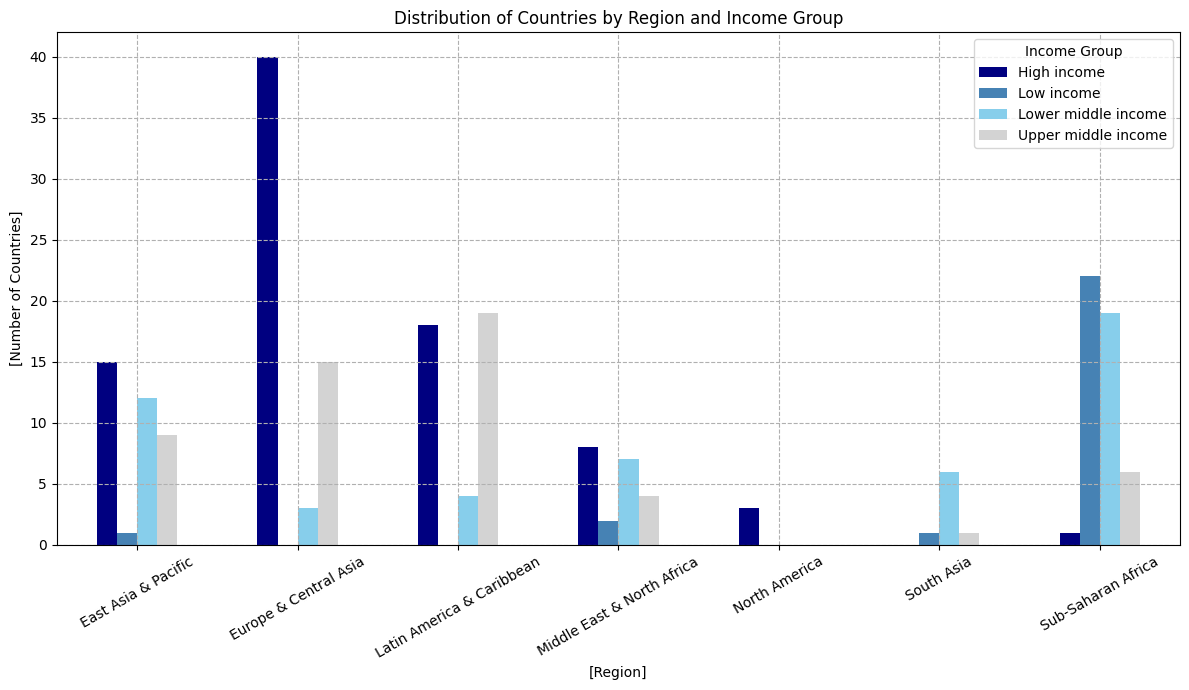

In [14]:
import matplotlib.pyplot as plt

grouped.plot(kind='bar', figsize=(12, 7,),color=["navy", "steelblue", "skyblue", "lightgray"])

plt.title('Distribution of Countries by Region and Income Group',color='black')
plt.xlabel('[Region]',color='black')
plt.ylabel('[Number of Countries]',color="black")
plt.xticks(rotation=30)
plt.legend(title='Income Group')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()